In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the requests library & API Key.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
 # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | beringovskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | khatanga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | louisbourg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | lamu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | lubao
-----------------------------
Data Retrieval Complete      
-----------------------------
Proc

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | aksarka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | georgetown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | bethel
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | tsihombe
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | nguiu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | mahibadhoo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | kenai
-----------------------------
Da

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | thurso
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | whitehorse
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | ancud
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | okhotsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | caravelas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | vardo
-----------------------------
Data Retrieval Complete      
--------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | hithadhoo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | comodoro rivadavia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | grand river south east
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | east london
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | port elizabeth
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | camana
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 5 | falealupo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | taoudenni
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | lebu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | buariki
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | maceio
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | nome
-----------------------------
Data Ret

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 7 | morant bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 7 | vaitupu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | lagoa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | lasa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | kjollefjord
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | evensk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | kaseda
-----------------------------
Data Retrieval Complete      
--

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 23 of Set 8 | mys shmidta
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 24 of Set 8 | leh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | westport
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | mirina
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | naspur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | mahebourg
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | ndola
-----------------------------
Data 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 35 of Set 9 | zemio
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 36 of Set 9 | dunedin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | whitianga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | qui nhon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | matara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | ibra
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | merauke
-----------------------------
Data Retrieval Complete      
-----------------------------
Pro

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 47 of Set 10 | north bend
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 48 of Set 10 | berlevag
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | kankaanpaa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | umm lajj
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | talnakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | dvurechensk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | marsh harbour
-----------------------------
Data Retrieval Complete      
--------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 9 of Set 12 | greece
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | namalenga
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | birao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | correntina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | gambita
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | ugoofaaru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | krasnoselkup
-----------------------------
Data Retrieval Co

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,59.81,86,7,11.86,ZA,2021-10-09 01:20:20
1,Beringovskiy,63.0500,179.3167,32.90,98,100,15.26,RU,2021-10-09 01:20:20
2,Rikitea,-23.1203,-134.9692,74.68,77,100,10.33,PF,2021-10-09 01:20:20
3,Khatanga,71.9667,102.5000,16.90,97,99,3.31,RU,2021-10-09 01:20:21
4,Lamu,-2.2717,40.9020,77.22,81,6,12.71,KE,2021-10-09 01:20:21
5,Lubao,14.9167,120.5500,86.02,72,90,1.66,PH,2021-10-09 01:20:21
6,Nara,34.6851,135.8049,79.97,52,1,3.58,JP,2021-10-09 01:20:22
7,Beyneu,45.3167,55.2000,42.75,44,12,8.99,KZ,2021-10-09 01:20:22
8,Buala,-8.1450,159.5921,85.17,70,94,7.25,SB,2021-10-09 01:20:22
9,Airai,-8.9266,125.4092,78.26,29,6,5.68,TL,2021-10-09 01:20:23


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-10-09 01:20:20,-34.4187,19.2345,59.81,86,7,11.86
1,Beringovskiy,RU,2021-10-09 01:20:20,63.0500,179.3167,32.90,98,100,15.26
2,Rikitea,PF,2021-10-09 01:20:20,-23.1203,-134.9692,74.68,77,100,10.33
3,Khatanga,RU,2021-10-09 01:20:21,71.9667,102.5000,16.90,97,99,3.31
4,Lamu,KE,2021-10-09 01:20:21,-2.2717,40.9020,77.22,81,6,12.71
5,Lubao,PH,2021-10-09 01:20:21,14.9167,120.5500,86.02,72,90,1.66
6,Nara,JP,2021-10-09 01:20:22,34.6851,135.8049,79.97,52,1,3.58
7,Beyneu,KZ,2021-10-09 01:20:22,45.3167,55.2000,42.75,44,12,8.99
8,Buala,SB,2021-10-09 01:20:22,-8.1450,159.5921,85.17,70,94,7.25
9,Airai,TL,2021-10-09 01:20:23,-8.9266,125.4092,78.26,29,6,5.68


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/08/21'

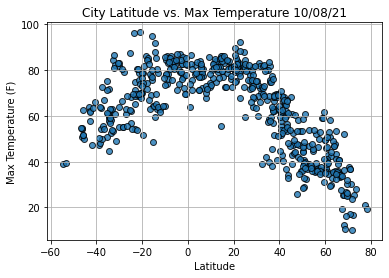

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

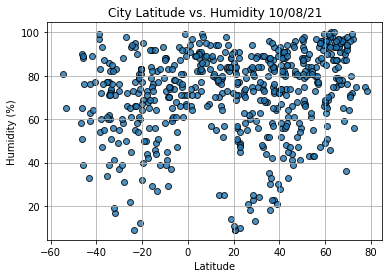

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

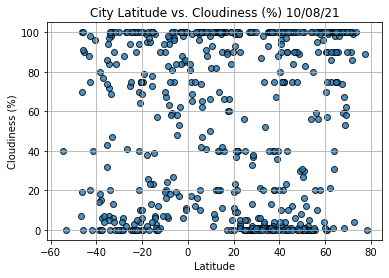

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

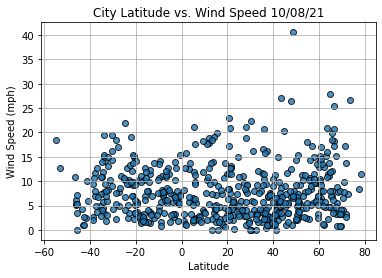

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                        Kapaa
Country                        US
Date          2021-10-09 01:20:24
Lat                       22.0752
Lng                      -159.319
Max Temp                    82.38
Humidity                       71
Cloudiness                     40
Wind Speed                   5.01
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Beringovskiy,RU,2021-10-09 01:20:20,63.0500,179.3167,32.90,98,100,15.26
3,Khatanga,RU,2021-10-09 01:20:21,71.9667,102.5000,16.90,97,99,3.31
5,Lubao,PH,2021-10-09 01:20:21,14.9167,120.5500,86.02,72,90,1.66
6,Nara,JP,2021-10-09 01:20:22,34.6851,135.8049,79.97,52,1,3.58
7,Beyneu,KZ,2021-10-09 01:20:22,45.3167,55.2000,42.75,44,12,8.99


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

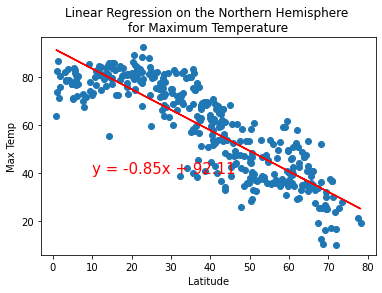

In [23]:
# Linear regression on the Northern Hemisphere  Maximum Temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(10,40))

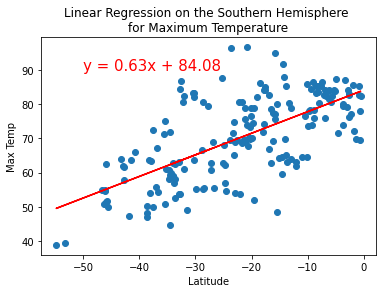

In [24]:
# Linear regression on the Southern Hemisphere  Maximum Temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Maximum Temperature', 'Max Temp',(-50,90))

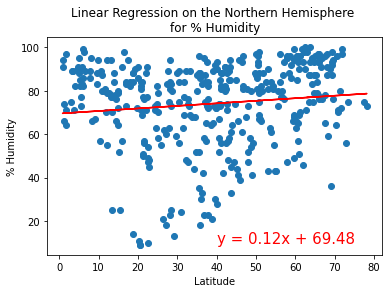

In [25]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for % Humidity', '% Humidity',(40,10))

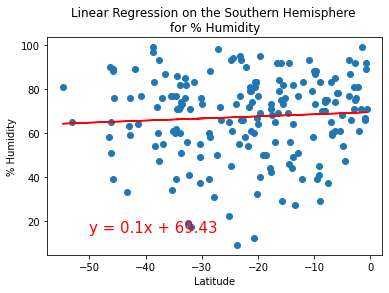

In [26]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for % Humidity', '% Humidity',(-50,15))

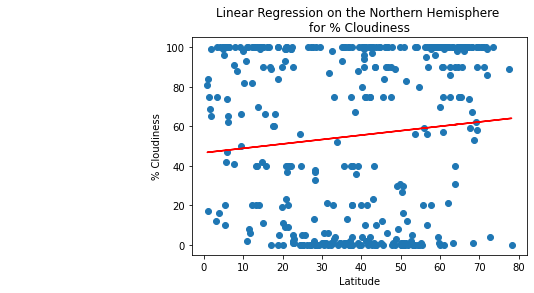

In [27]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for % Cloudiness', '% Cloudiness',(-50,60))

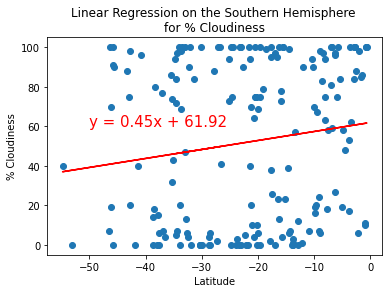

In [28]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for % Cloudiness', '% Cloudiness',(-50,60))

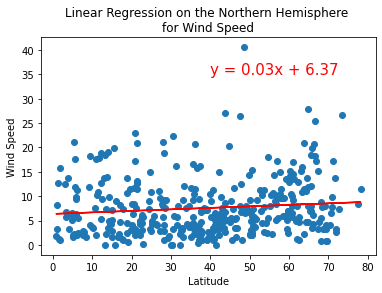

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' 
                       'for Wind Speed', 'Wind Speed',(40,35))

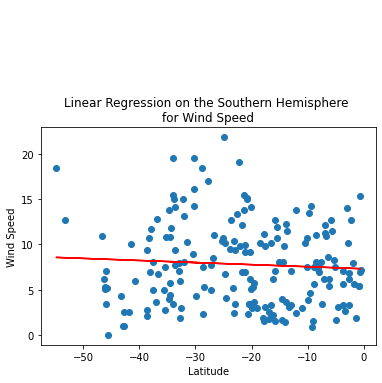

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' 
                       'for Wind Speed', 'Wind Speed',(-50,35))